In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('../hba')
import visualization
import preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Matplotlib created a temporary cache directory at /tmp/matplotlib-sqtlr13g because the default path (/home/vscode/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
#ファイルの読込
df = pd.read_csv("../csv/全突合R4マスタ240524.csv")
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27926 entries, 0 to 27925
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   病院                                     27926 non-null  object
 1   医療機関名_x                                27926 non-null  object
 2   都道府県コード_x                              27926 non-null  object
 3   構想区域コード_x                              27926 non-null  object
 4   構想区域名称_x                               27926 non-null  object
 5   市区町村名称_x                               27926 non-null  object
 6   設置主体（2022（令和4）年7月1日時点）                 27926 non-null  object
 7   DPC医療機関群の種類                            27926 non-null  object
 8   特定機能病院の承認の有無                           27926 non-null  object
 9   地域医療支援病院の承認の有無                         27926 non-null  object
 10  総合入院体制加算の届出の有無                         27926 non-null  object
 11  急性期充実体制加算の届出の有無

/tmp/ipykernel_775/1539367363.py:2: DtypeWarning: Columns (2,3,15,16,17,18,19,20,21,22,24,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../csv/全突合R4マスタ240524.csv")


In [3]:
#スプシバグ手動修正
df.rename(columns={'施設全体_医師_常勤':'病棟コード\n（R4）', '施設全体_医師_非常勤':'病棟名_x', '病棟コード\n（R4）':'建築時期', '病棟名_x':'構造', '建築時期':'保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）',
        '保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）':'保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）'}, inplace=True)
df.drop(['医師_専従','医師_専任','救急車の受入件数','休日に受診した患者延べ数','休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数','夜間・時間外に受診した患者延べ数','夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数'],axis=1,inplace=True)
df.head()

0  病院          医療機関名_x 都道府県コード_x 構想区域コード_x 構想区域名称_x 市区町村名称_x  \
0  病院         市立函館恵山病院         1       101      南渡島      函館市   
1  病院  医療法人社団玄心会吉田眼科病院         1       101      南渡島      函館市   
2  病院           市立函館病院         1       101      南渡島      函館市   
3  病院           市立函館病院         1       101      南渡島      函館市   
4  病院           市立函館病院         1       101      南渡島      函館市   

0 設置主体（2022（令和4）年7月1日時点） DPC医療機関群の種類 特定機能病院の承認の有無 地域医療支援病院の承認の有無  \
0                    市町村   ＤＰＣ病院ではない           無し             無し   
1                   医療法人   ＤＰＣ病院ではない           無し             無し   
2                    市町村    ＤＰＣ標準病院群           無し             有り   
3                    市町村    ＤＰＣ標準病院群           無し             有り   
4                    市町村    ＤＰＣ標準病院群           無し             有り   

0  総合入院体制加算の届出の有無 急性期充実体制加算の届出の有無 三次救急医療施設の認定の有無 二次救急医療施設の認定の有無 救急告示病院の告示の有無  \
0            届出無し              無し             無し             有り           有り   
1            届出無し              無し             無し             無し           無し   
2  総合入院体制加算２の届出有り              無し             有り             有り           有り   
3  総合入院体制加算２の届出有り              無し             有り             有り           有り   
4  総合入院体制加算２の届出有り              無し             有り             有り           有り   

0   病棟コード\n（R4）       病棟名_x  建築時期           構造  \
0  101010042101          病棟  2002    鉄筋コンクリート造   
1  101010069101          病棟  1983    鉄筋コンクリート造   
2  101010044101       ３階東病棟  2000  鉄骨鉄筋コンクリート造   
3  101010044102  ３階南病棟（休床中）  2000  鉄骨鉄筋コンクリート造   
4  101010044103       ４階東病棟  2000  鉄骨鉄筋コンクリート造   

0 保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能） 保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）  \
0                                   慢性期                                 慢性期   
1                                   急性期                                 急性期   
2                                   急性期                                 急性期   
3                         休棟中（今後再開する予定）                               高度急性期   
4                                 高度急性期                               高度急性期   

0 一般病床_許可病床 一般病床_最大使用病床数 一般病床_最小使用病床数 療養病床_許可病床 療養病床_最大使用病床数 療養病床_最小使用病床数  \
0         0            0            0        60           40           29   
1        40           40           10         0            0            0   
2        34           23            3         0            0            0   
3        16            0            0         0            0            0   
4        48           48           27         0            0            0   

0 新規入棟患者数（年間） うち予定入院の患者・院内の他病棟からの転棟患者 うち、予定外の救急医療入院以外の入院患者（年間）  \
0         106                      28                       69   
1        1182                    1120                        0   
2        1184                     592                      560   
3           0                       0                        0   
4        1008                     566                       66   

0 うち、予定外の救急医療入院の患者（年間） 在棟患者延べ数（年間） 退棟患者数（年間） 新規入棟患者数（年間）.1 うち、院内の他病棟からの転棟（年間）  \
0                    9       12371       110           106                  0   
1                   62        9827      1184          1182               1171   
2                   32        5930      1172          1184                 33   
3                    0           0         0             0                  0   
4                  376       16107       988          1008                259   

0 うち、家庭からの入院（年間） うち、他の病院、診療所からの転院（年間） うち、介護施設、福祉施設からの入院（年間） うち、介護医療院からの入院（年間）  \
0             43                   28                    35                 0   
1              0                    1                    10                 0   
2           1026                    6                     0                 0   
3              0                    0                     0                 0   
4            677                   26                    46                 0   

0 うち、院内の出生（年間） うち、その他（年間）  構想区域人口  
0            0          0  359223  
1            0          0  359223  
2      

In [4]:
#ファイル追加
add_df = pd.read_csv("../csv/全突合R4マスタ240527.csv")
add_df.columns = add_df.iloc[0]
add_df = add_df[1:].reset_index(drop=True)
add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27926 entries, 0 to 27925
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   休日に受診した患者延べ数                          27926 non-null  object 
 1   休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数      27926 non-null  object 
 2   夜間・時間外に受診した患者延べ数                      27926 non-null  object 
 3   夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数  27926 non-null  object 
 4   救急車の受入件数                              27926 non-null  object 
 5   施設全体_医師_常勤                            27926 non-null  object 
 6   施設全体_医師_非常勤                           27926 non-null  object 
 7   nan                                   0 non-null      float64
 8   nan                                   0 non-null      float64
 9   nan                                   0 non-null      float64
 10  nan                                   0 non-null      float64
 11  nan            

In [5]:
add_df = add_df[['休日に受診した患者延べ数','休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数',
                    '夜間・時間外に受診した患者延べ数','夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数',
                    '救急車の受入件数','施設全体_医師_常勤','施設全体_医師_非常勤']]
df = pd.concat([df, add_df], axis=1)

In [6]:
#ファイル追加
add_df = pd.read_csv("../csv/全突合R4マスタ240529.csv")
add_df.columns = add_df.iloc[0]
add_df = add_df[1:].reset_index(drop=True)
add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27926 entries, 0 to 27925
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   医療機関名_x                27926 non-null  object 
 1   手術総数                   26855 non-null  object 
 2   全身麻酔の手術総数              26855 non-null  object 
 3   放射線治療                  26855 non-null  object 
 4   化学療法                   26855 non-null  object 
 5   nan                    0 non-null      float64
 6   nan                    0 non-null      float64
 7   nan                    0 non-null      float64
 8   nan                    0 non-null      float64
 9   nan                    0 non-null      float64
 10  nan                    0 non-null      float64
 11  nan                    0 non-null      float64
 12  nan                    0 non-null      float64
 13  nan                    0 non-null      float64
 14  nan                    0 non-null      float64
 15  na

In [7]:
add_df = add_df[['手術総数','全身麻酔の手術総数','放射線治療','化学療法']]
df = pd.concat([df, add_df], axis=1)
df.head()

0  病院          医療機関名_x 都道府県コード_x 構想区域コード_x 構想区域名称_x 市区町村名称_x  \
0  病院         市立函館恵山病院         1       101      南渡島      函館市   
1  病院  医療法人社団玄心会吉田眼科病院         1       101      南渡島      函館市   
2  病院           市立函館病院         1       101      南渡島      函館市   
3  病院           市立函館病院         1       101      南渡島      函館市   
4  病院           市立函館病院         1       101      南渡島      函館市   

0 設置主体（2022（令和4）年7月1日時点） DPC医療機関群の種類 特定機能病院の承認の有無 地域医療支援病院の承認の有無  \
0                    市町村   ＤＰＣ病院ではない           無し             無し   
1                   医療法人   ＤＰＣ病院ではない           無し             無し   
2                    市町村    ＤＰＣ標準病院群           無し             有り   
3                    市町村    ＤＰＣ標準病院群           無し             有り   
4                    市町村    ＤＰＣ標準病院群           無し             有り   

0  総合入院体制加算の届出の有無 急性期充実体制加算の届出の有無 三次救急医療施設の認定の有無 二次救急医療施設の認定の有無 救急告示病院の告示の有無  \
0            届出無し              無し             無し             有り           有り   
1            届出無し              無し             無し             無し           無し   
2  総合入院体制加算２の届出有り              無し             有り             有り           有り   
3  総合入院体制加算２の届出有り              無し             有り             有り           有り   
4  総合入院体制加算２の届出有り              無し             有り             有り           有り   

0   病棟コード\n（R4）       病棟名_x  建築時期           構造  \
0  101010042101          病棟  2002    鉄筋コンクリート造   
1  101010069101          病棟  1983    鉄筋コンクリート造   
2  101010044101       ３階東病棟  2000  鉄骨鉄筋コンクリート造   
3  101010044102  ３階南病棟（休床中）  2000  鉄骨鉄筋コンクリート造   
4  101010044103       ４階東病棟  2000  鉄骨鉄筋コンクリート造   

0 保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能） 保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）  \
0                                   慢性期                                 慢性期   
1                                   急性期                                 急性期   
2                                   急性期                                 急性期   
3                         休棟中（今後再開する予定）                               高度急性期   
4                                 高度急性期                               高度急性期   

0 一般病床_許可病床 一般病床_最大使用病床数 一般病床_最小使用病床数 療養病床_許可病床 療養病床_最大使用病床数 療養病床_最小使用病床数  \
0         0            0            0        60           40           29   
1        40           40           10         0            0            0   
2        34           23            3         0            0            0   
3        16            0            0         0            0            0   
4        48           48           27         0            0            0   

0 新規入棟患者数（年間） うち予定入院の患者・院内の他病棟からの転棟患者 うち、予定外の救急医療入院以外の入院患者（年間）  \
0         106                      28                       69   
1        1182                    1120                        0   
2        1184                     592                      560   
3           0                       0                        0   
4        1008                     566                       66   

0 うち、予定外の救急医療入院の患者（年間） 在棟患者延べ数（年間） 退棟患者数（年間） 新規入棟患者数（年間）.1 うち、院内の他病棟からの転棟（年間）  \
0                    9       12371       110           106                  0   
1                   62        9827      1184          1182               1171   
2                   32        5930      1172          1184                 33   
3                    0           0         0             0                  0   
4                  376       16107       988          1008                259   

0 うち、家庭からの入院（年間） うち、他の病院、診療所からの転院（年間） うち、介護施設、福祉施設からの入院（年間） うち、介護医療院からの入院（年間）  \
0             43                   28                    35                 0   
1              0                    1                    10                 0   
2           1026                    6                     0                 0   
3              0                    0                     0                 0   
4            677                   26                    46                 0   

0 うち、院内の出生（年間） うち、その他（年間）  構想区域人口 休日に受診した患者延べ数  \
0            0          0  359223           60   
1            0 

array([<Axes: ylabel='Count'>], dtype=object)

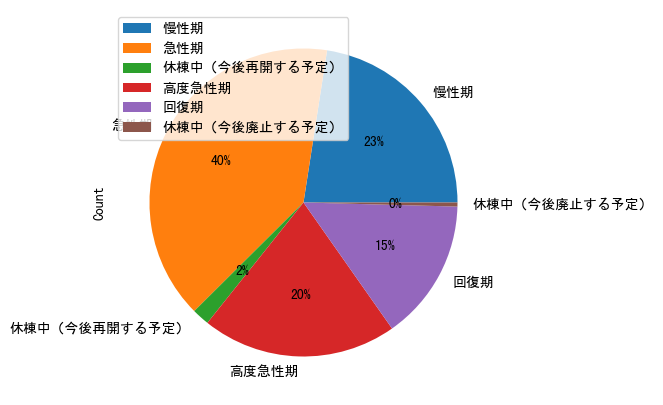

In [8]:
#病棟調査
ward = preprocessing.tag_count(df["保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）"])
ward.plot.pie(subplots=True,figsize=(5, 5),autopct='%.f%%')
####円グラフは視覚的誤認を与える可能性があるので極力避ける！

In [9]:
df.columns

Index(['病院', '医療機関名_x', '都道府県コード_x', '構想区域コード_x', '構想区域名称_x', '市区町村名称_x',
       '設置主体（2022（令和4）年7月1日時点）', 'DPC医療機関群の種類', '特定機能病院の承認の有無',
       '地域医療支援病院の承認の有無', '総合入院体制加算の届出の有無', '急性期充実体制加算の届出の有無', '三次救急医療施設の認定の有無',
       '二次救急医療施設の認定の有無', '救急告示病院の告示の有無', '病棟コード\n（R4）', '病棟名_x', '建築時期', '構造',
       '保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）',
       '保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）', '一般病床_許可病床', '一般病床_最大使用病床数',
       '一般病床_最小使用病床数', '療養病床_許可病床', '療養病床_最大使用病床数', '療養病床_最小使用病床数',
       '新規入棟患者数（年間）', 'うち予定入院の患者・院内の他病棟からの転棟患者', 'うち、予定外の救急医療入院以外の入院患者（年間）',
       'うち、予定外の救急医療入院の患者（年間）', '在棟患者延べ数（年間）', '退棟患者数（年間）', '新規入棟患者数（年間）.1',
       'うち、院内の他病棟からの転棟（年間）', 'うち、家庭からの入院（年間）', 'うち、他の病院、診療所からの転院（年間）',
       'うち、介護施設、福祉施設からの入院（年間）', 'うち、介護医療院からの入院（年間）', 'うち、院内の出生（年間）',
       'うち、その他（年間）', '構想区域人口', '休日に受診した患者延べ数',
       '休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数', '夜間・時間外に受診した患者延べ数',
       '夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数', '救急車の受入件数', '施設全体_医師_常勤',
       '施設全体_医師_非常勤', '手術総数', '全身麻酔の

In [10]:
for col in df.columns: #object->float
    try:
        df[col] = pd.to_numeric(df[col], errors='raise')
    except ValueError:
        # 変換できない列は無視
        pass

df["病棟総病床数"] = df["一般病床_許可病床"] + df["療養病床_許可病床"]
df['院内総新規入棟患者数（年間）'] = df.groupby("医療機関名_x")['新規入棟患者数（年間）'].transform("sum")
df["院内総一般病床数"] = df.groupby("医療機関名_x")["一般病床_許可病床"].transform("sum")
df["院内総病床数"] = df.groupby("医療機関名_x")["病棟総病床数"].transform("sum")
df["急性期病床数の施設全体に占める割合"]= df["病棟総病床数"] / df["院内総病床数"] * 100
df["施設全体_医師"] = df["施設全体_医師_常勤"] + df["施設全体_医師_非常勤"]
df = df.loc[df["保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）"] ==  "急性期"].reset_index(drop=True) #急性期病棟の抽出

PREF = ["都道府県コード_x","構想区域名称_x","休日に受診した患者延べ数",'休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数',"夜間・時間外に受診した患者延べ数",
        '夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数',"救急車の受入件数","施設全体_医師","施設全体_医師_常勤","院内総病床数","院内総一般病床数",'院内総新規入棟患者数（年間）']
TARGETS = ["一般病床_許可病床","療養病床_許可病床","在棟患者延べ数（年間）","新規入棟患者数（年間）","退棟患者数（年間）","急性期病床数の施設全体に占める割合",
            'うち、院内の他病棟からの転棟（年間）','うち、家庭からの入院（年間）','うち、他の病院、診療所からの転院（年間）','うち、介護施設、福祉施設からの入院（年間）',
            'うち、介護医療院からの入院（年間）','うち、院内の出生（年間）','うち、その他（年間）','手術総数','全身麻酔の手術総数','放射線治療','化学療法']
hdf = df.groupby('医療機関名_x')[PREF + TARGETS
                            ].agg({**{m:'first' for m in PREF},**{t:'sum' for t in TARGETS}}).reset_index()
hdf = hdf.join((df.groupby('構想区域名称_x')['構想区域人口'].apply(lambda x: x.mode()[0])), on='構想区域名称_x') #データ補正

hdf["病床利用率"] = hdf["在棟患者延べ数（年間）"] * 100 / (hdf["一般病床_許可病床"] + hdf["療養病床_許可病床"]) / 365 #診療実日数を365日とする
hdf["平均存棟日数"] = hdf["在棟患者延べ数（年間）"] / (hdf["新規入棟患者数（年間）"] + hdf["退棟患者数（年間）"]) * 2
hdf['新規入棟患者数のうち院内の他病棟からの転棟の割合']= hdf['うち、院内の他病棟からの転棟（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち家庭からの入院の割合']= hdf['うち、家庭からの入院（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち他の病院、診療所からの転院の割合']= hdf['うち、他の病院、診療所からの転院（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち介護施設、福祉施設からの入院の割合']= hdf['うち、介護施設、福祉施設からの入院（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち介護医療院からの入院の割合']= hdf['うち、介護医療院からの入院（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち院内の出生（年間）']= hdf['うち、院内の出生（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうちその他の割合'] = hdf['うち、その他（年間）'] / hdf['新規入棟患者数（年間）'] * 100

In [11]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   医療機関名_x                               4013 non-null   object 
 1   都道府県コード_x                             4013 non-null   int64  
 2   構想区域名称_x                              4013 non-null   object 
 3   休日に受診した患者延べ数                          4013 non-null   int64  
 4   休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数      4013 non-null   int64  
 5   夜間・時間外に受診した患者延べ数                      4013 non-null   int64  
 6   夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数  4013 non-null   int64  
 7   救急車の受入件数                              4013 non-null   int64  
 8   施設全体_医師                               4013 non-null   float64
 9   施設全体_医師_常勤                            4013 non-null   int64  
 10  院内総病床数                                4013 non-null   int64  
 11  院内総一般病床数         

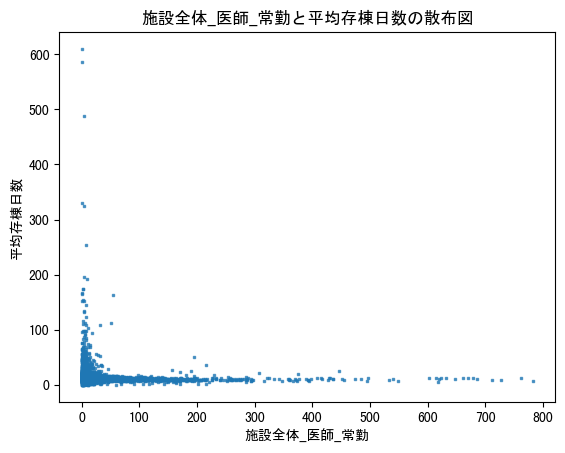

In [12]:
def plot_scatter(df, cols):
    x = df[cols[0]]
    y = df[cols[1]]

    plt.scatter(x, y, s=3, marker='s', alpha=0.7)

    plt.xlabel(cols[0])
    plt.ylabel(cols[1])

    plt.title(f'{cols[0]}と{cols[1]}の散布図')
    plt.show()
    return None

plot_scatter(hdf, ['施設全体_医師_常勤','平均存棟日数'])

### 個別医療機関における救急患者受入に関する評価基準について
1. 医療機関が受け入れた救急搬送患者 / 医療圏人口 *1000
2. 医療機関が受け入れた救急搬送患者 / 構想区域の総救急車受入件数 *100

In [13]:
hdf['構想区域人口あたりの救急車受入件数'] =  hdf['救急車の受入件数'] / hdf['構想区域人口'] * 1000
hdf['構想区域全体の総救急車受入件数'] = hdf.groupby('構想区域名称_x')['救急車の受入件数'].transform("sum")
hdf['個別医療機関の救急車受入数の構想区域全体に占める割合'] = hdf['救急車の受入件数'] / hdf['構想区域全体の総救急車受入件数'] *100

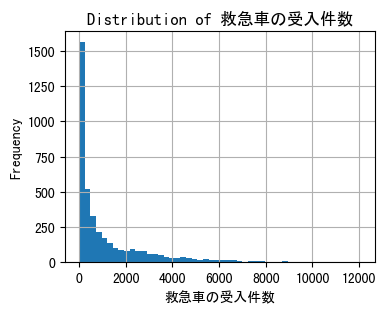

In [14]:
def plot_hist(df,col, bins=None):
    finite_values = df[col][np.isfinite(df[col])]
    plt.figure(figsize=(4, 3))
    finite_values.hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    return None

plot_hist(hdf, '救急車の受入件数')

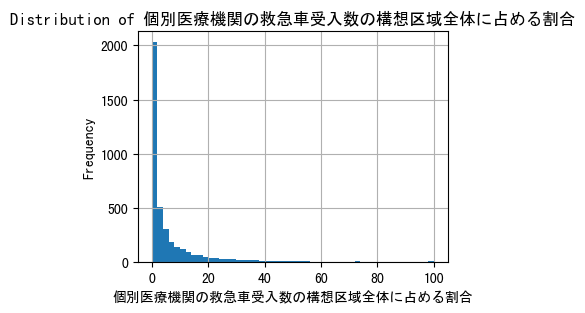

In [15]:
plot_hist(hdf, '個別医療機関の救急車受入数の構想区域全体に占める割合')

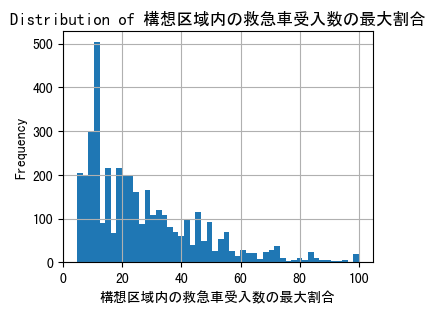

In [16]:
hdf['構想区域内の救急車受入数の最大割合'] = hdf['構想区域名称_x'].map(hdf.groupby('構想区域名称_x')['個別医療機関の救急車受入数の構想区域全体に占める割合'].max())
plot_hist(hdf, '構想区域内の救急車受入数の最大割合')

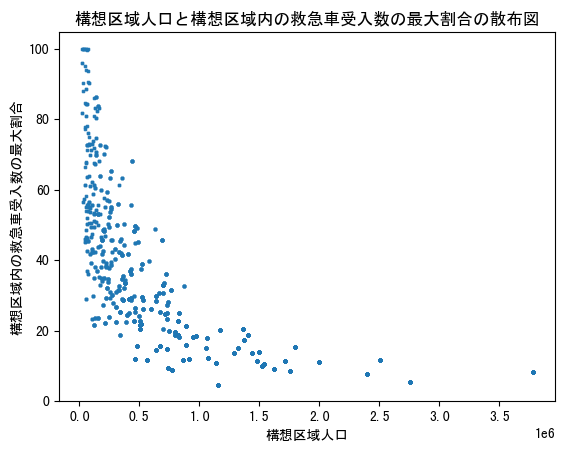

In [17]:
plot_scatter(hdf, ['構想区域人口','構想区域内の救急車受入数の最大割合'])

### 個別医療機関における医師数に関する評価基準について
1. 院内の常勤医師の割合
2. 病床数あたりの常勤医師数
3. 病床数あたりの医師数(常勤+非常勤)

In [18]:
hdf['施設全体の医師のうち常勤医師の割合'] = hdf['施設全体_医師_常勤'] / hdf['施設全体_医師'] * 100
hdf['構想区域全体の常勤医師数'] = hdf.groupby('構想区域名称_x')['施設全体_医師_常勤'].transform("sum")
hdf['個別医療機関の常勤医師数の構想区域全体に占める割合'] = hdf['施設全体_医師_常勤'] / hdf['構想区域全体の常勤医師数'] *100
hdf['構想区域全体の医師数'] = hdf.groupby('構想区域名称_x')['施設全体_医師'].transform("sum")
hdf['個別医療機関の医師数の構想区域全体に占める割合'] = hdf['施設全体_医師'] / hdf['構想区域全体の医師数'] *100
hdf['構想区域人口あたりの常勤医師数'] = hdf['構想区域全体の常勤医師数'] / hdf['構想区域人口'] * 1000
hdf['構想区域人口あたりの医師数'] = hdf['構想区域全体の医師数'] / hdf['構想区域人口'] * 1000
hdf['病床数あたりの常勤医師数'] = hdf['施設全体_医師_常勤'] / hdf['院内総病床数']
hdf['病床数あたりの医師数'] = hdf['施設全体_医師'] / hdf['院内総病床数']

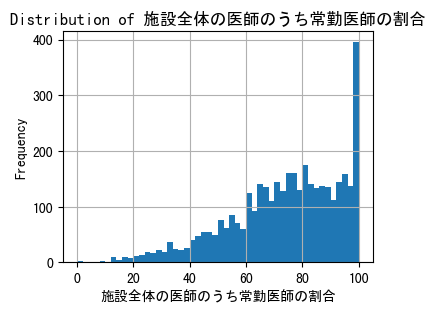

In [19]:
plot_hist(hdf, '施設全体の医師のうち常勤医師の割合')

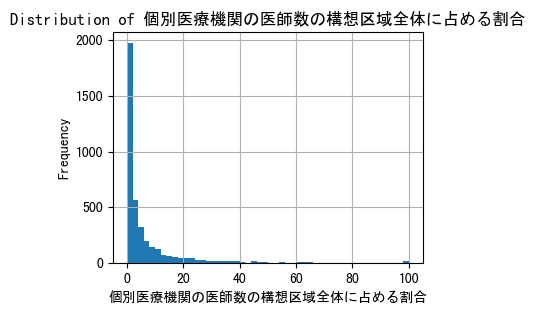

In [20]:
plot_hist(hdf, '個別医療機関の医師数の構想区域全体に占める割合')

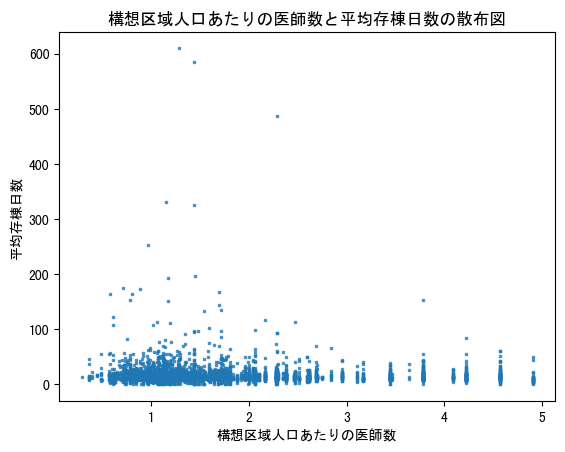

In [21]:
plot_scatter(hdf, ['構想区域人口あたりの医師数','平均存棟日数'])

### 松本千寿氏ご依頼案件
A. 救急受入と新規入棟患者の属性の関係性  
B. 小規模病院(院内一般病床300床未満)のEDA

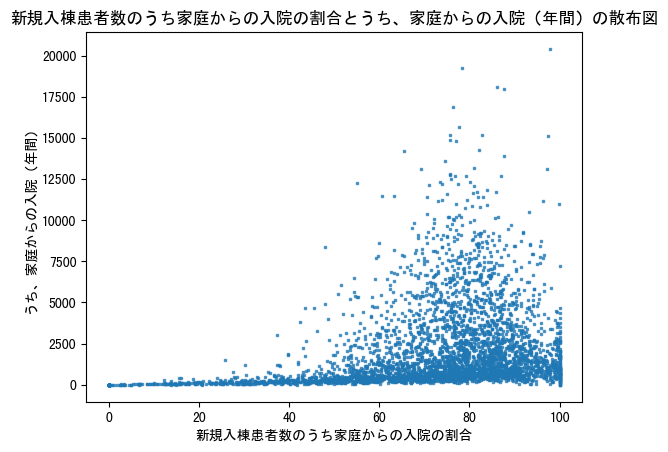

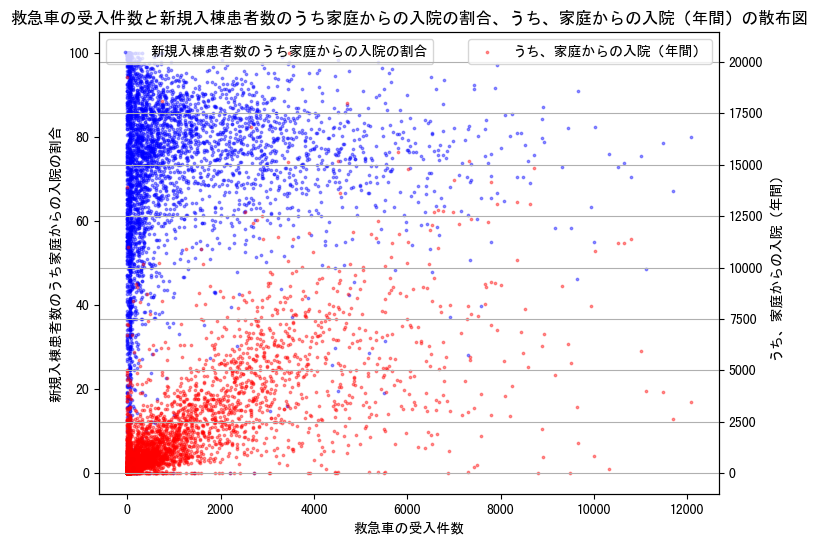

In [22]:
def plot_scatter2(df, cols):
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax2 = ax1.twinx()
    ax1.scatter(df[cols[0]], df[cols[1]], label=cols[1], color='b', s=3, alpha=0.4)
    ax2.scatter(df[cols[0]], df[cols[2]], label=cols[2], color='r', s=3, alpha=0.4)

    # グラフのタイトルとラベルを設定
    plt.title(f'{cols[0]}と{cols[1]}、{cols[2]}の散布図')

    ax1.set_xlabel(cols[0])
    ax1.set_ylabel(cols[1])
    ax2.set_ylabel(cols[2])
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.grid(True)
    plt.show()
    return None

plot_scatter(hdf, ['新規入棟患者数のうち家庭からの入院の割合','うち、家庭からの入院（年間）'] )
plot_scatter2(hdf, ['救急車の受入件数','新規入棟患者数のうち家庭からの入院の割合','うち、家庭からの入院（年間）'])

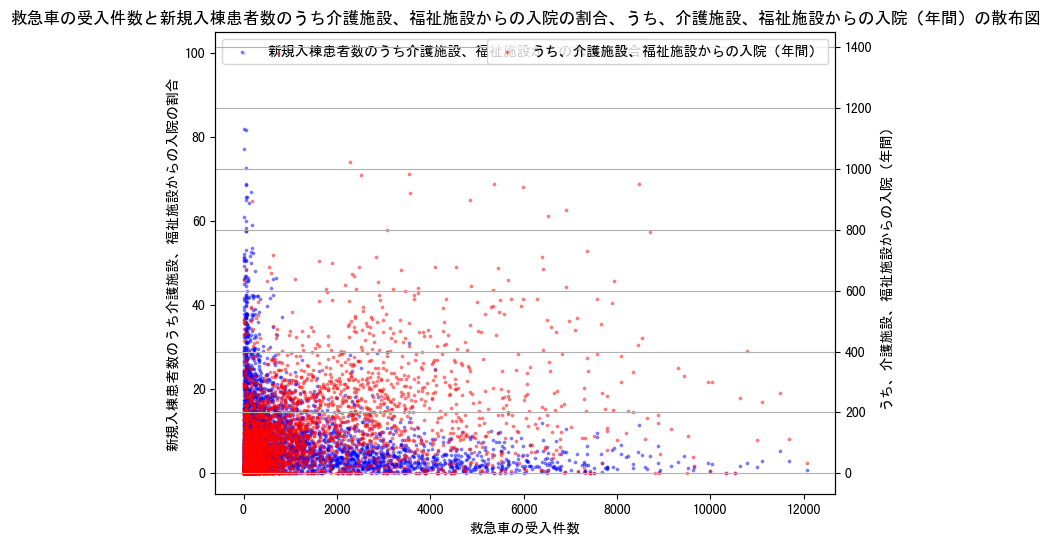

In [23]:
plot_scatter2(hdf, ['救急車の受入件数','新規入棟患者数のうち介護施設、福祉施設からの入院の割合','うち、介護施設、福祉施設からの入院（年間）'])

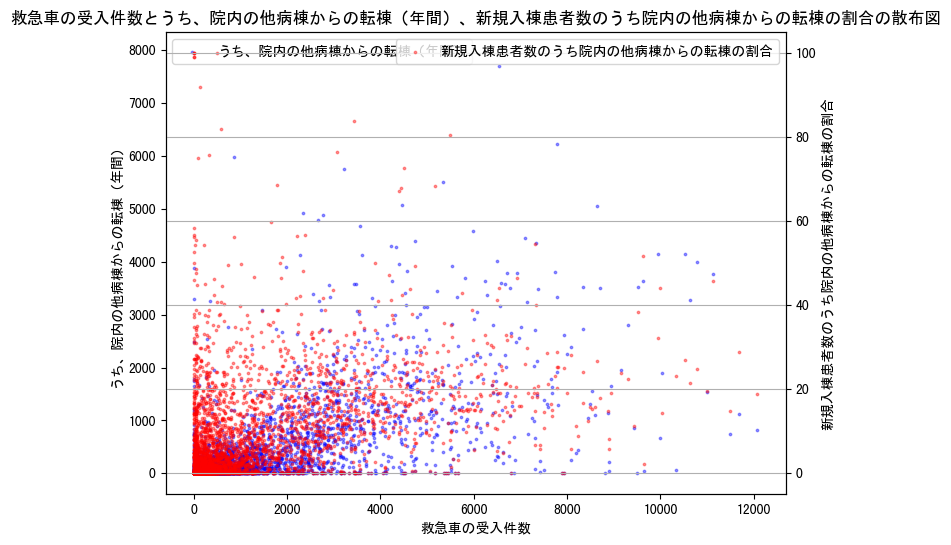

In [24]:
plot_scatter2(hdf, ['救急車の受入件数','うち、院内の他病棟からの転棟（年間）','新規入棟患者数のうち院内の他病棟からの転棟の割合'])

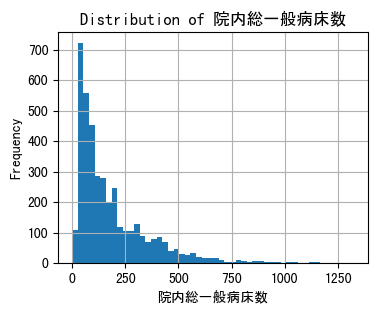

In [25]:
plot_hist(hdf, '院内総一般病床数')

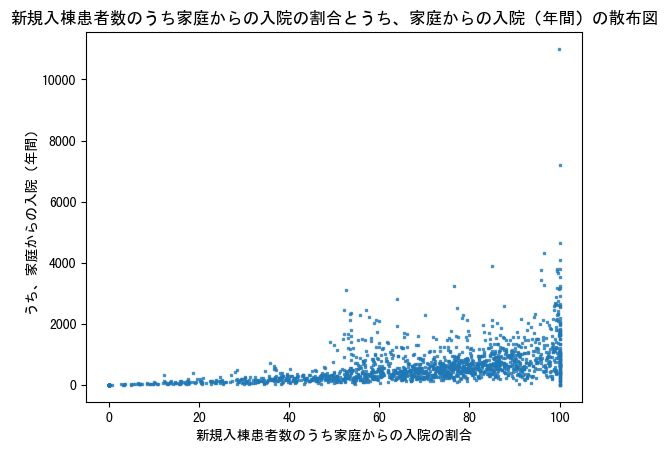

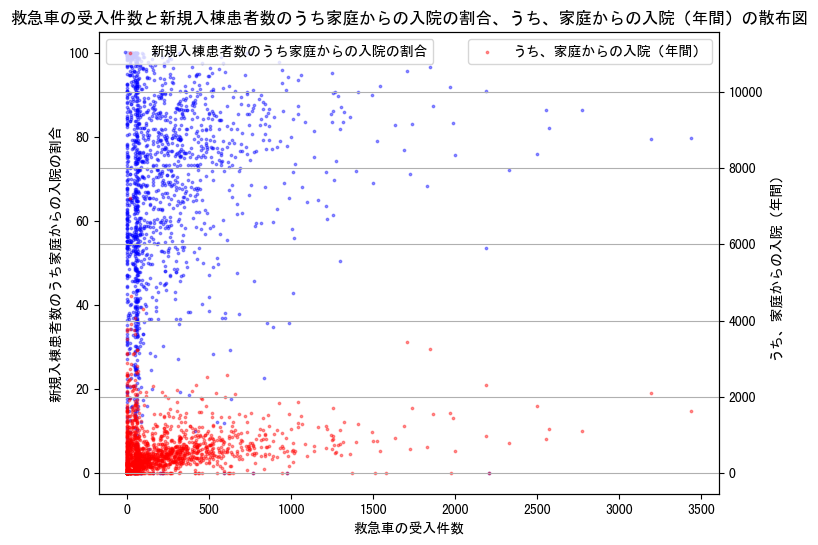

In [26]:
shdf = hdf[hdf[ '院内総一般病床数'] < 100] #4013 ->??
plot_scatter(shdf, ['新規入棟患者数のうち家庭からの入院の割合','うち、家庭からの入院（年間）'] )
plot_scatter2(shdf, ['救急車の受入件数','新規入棟患者数のうち家庭からの入院の割合','うち、家庭からの入院（年間）'])

In [27]:
#救急車受入件数を9つにカテゴリー分け
bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, float('inf')]
labels = [
    '0-250', '251-500', '501-750', '751-1000', '1001-1250',
    '1251-1500', '1501-1750', '1751-2000', '2001+'
]

hdf['救急受入件数のカテゴリー'] = pd.cut(hdf['救急車の受入件数'], bins=bins, labels=labels, right=False)
preprocessing.tag_count(hdf['救急受入件数のカテゴリー'])

Count
2001+        863
0-250       1580
1001-1250    174
251-500      527
501-750      332
1251-1500    139
751-1000     213
1751-2000     92
1501-1750     93

/tmp/ipykernel_775/1828750063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
/tmp/ipykernel_775/1828750063.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_labels_with_n, rotation=45)


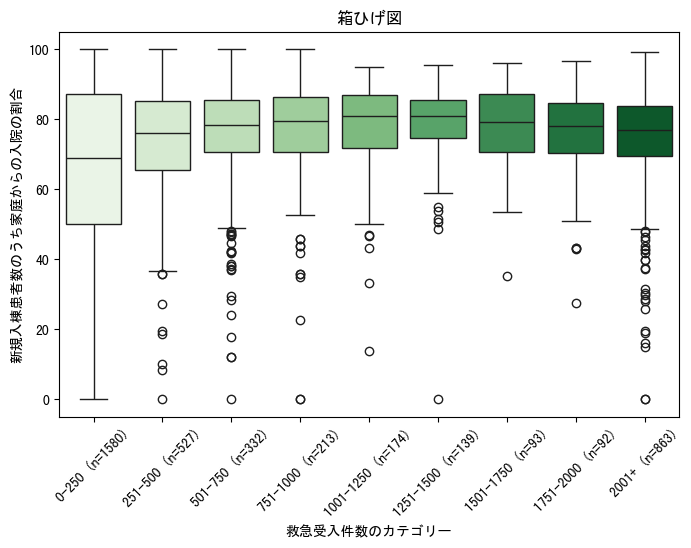

In [28]:
import seaborn as sns

def boxplot_cat(df,cols):
    n_counts = df[cols[0]].value_counts().sort_index()
    category_labels_with_n = [f'{label} (n={n_counts[label]})' for label in labels]

    plt.figure(figsize=(8, 5))
    ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
    ax.set_xticklabels(category_labels_with_n, rotation=45)

    plt.xticks(rotation=45)
    plt.title('箱ひげ図')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.show()
    return None

boxplot_cat(hdf, ['救急受入件数のカテゴリー', '新規入棟患者数のうち家庭からの入院の割合'])

下限：Q1 - 1.5×IQR
上限：Q3 + 1.5×IQR

/tmp/ipykernel_775/1828750063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
/tmp/ipykernel_775/1828750063.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_labels_with_n, rotation=45)


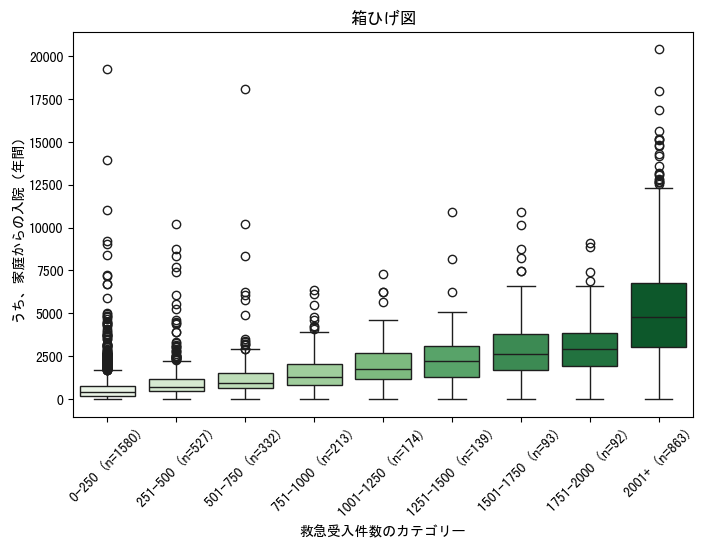

In [29]:
boxplot_cat(hdf, ['救急受入件数のカテゴリー', 'うち、家庭からの入院（年間）'])

/tmp/ipykernel_775/1828750063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
/tmp/ipykernel_775/1828750063.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_labels_with_n, rotation=45)


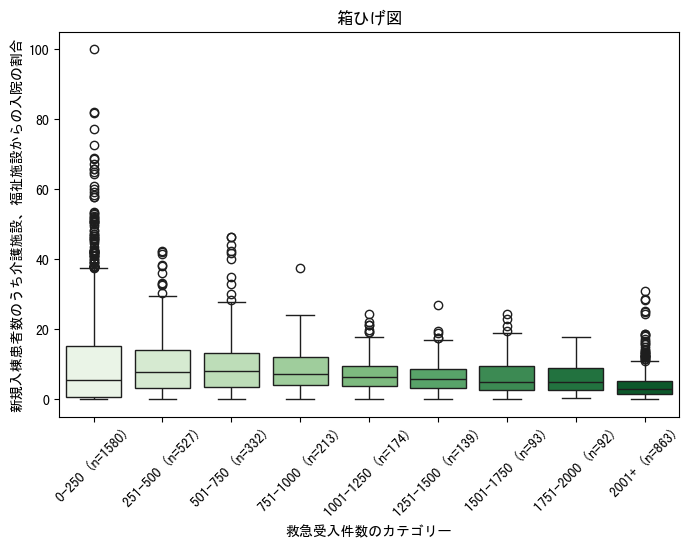

/tmp/ipykernel_775/1828750063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
/tmp/ipykernel_775/1828750063.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_labels_with_n, rotation=45)


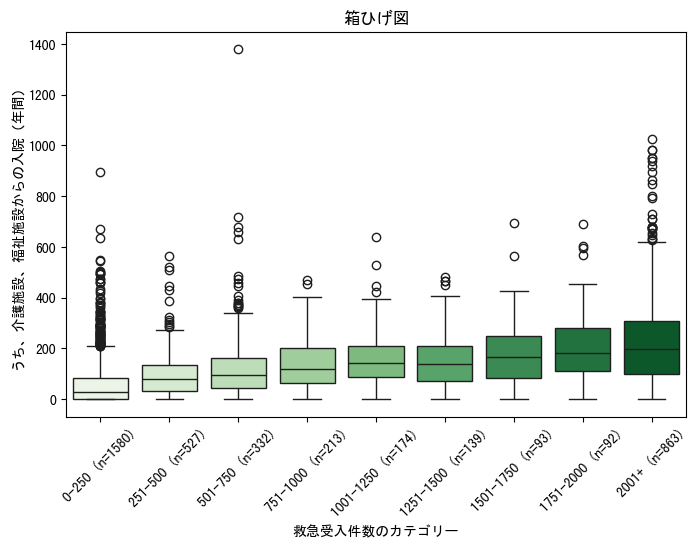

In [30]:
boxplot_cat(hdf, ['救急受入件数のカテゴリー', '新規入棟患者数のうち介護施設、福祉施設からの入院の割合'])
boxplot_cat(hdf, ['救急受入件数のカテゴリー', 'うち、介護施設、福祉施設からの入院（年間）'])

In [31]:
hdf['うち、他病棟、他院から転棟（年間）'] = hdf['うち、院内の他病棟からの転棟（年間）'] + hdf['うち、他の病院、診療所からの転院（年間）']
hdf['うち、施設からの入院（年間）'] = hdf['うち、介護施設、福祉施設からの入院（年間）'] + hdf['うち、介護医療院からの入院（年間）']
hdf['新規入棟患者数のうち他病棟、他院から転棟の割合'] = hdf['うち、他病棟、他院から転棟（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち施設からの入院の割合'] = hdf['うち、施設からの入院（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者のうち休日に受診診察後直ちに入院となった患者の割合'] = hdf['休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数'] / hdf['院内総新規入棟患者数（年間）'] * 100 #分母要注意
hdf['新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合'] = hdf['夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数'] / hdf['院内総新規入棟患者数（年間）'] * 100

In [32]:
#割り算によってinfが発生していることに要注意
print((hdf['新規入棟患者数（年間）'] == 0).sum())
print((hdf['院内総新規入棟患者数（年間）'] == 0).sum())
print(np.isinf(hdf['新規入棟患者のうち休日に受診診察後直ちに入院となった患者の割合']).sum())
print(np.isinf(hdf['新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合']).sum())
print(hdf['新規入棟患者のうち休日に受診診察後直ちに入院となった患者の割合'].max())
print(hdf['新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合'].max())

#inf -> nan
hdf = hdf.where(hdf != np.inf, np.nan)

136
115
70
64
inf
inf


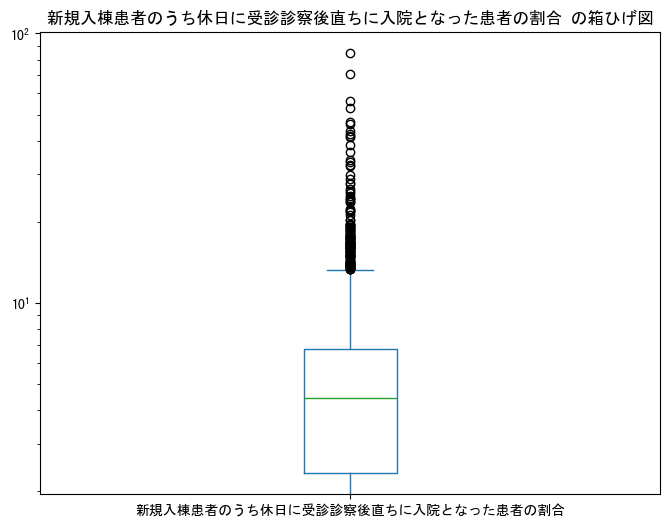

In [33]:
def boxplot(df, col, scale='log'):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_yscale(scale)
    df[col].plot.box(ax=ax)
    ax.set_title(f'{col} の箱ひげ図')
    plt.show()
    return None

boxplot(hdf,'新規入棟患者のうち休日に受診診察後直ちに入院となった患者の割合')

## 何を軸に可視化するか  
1. 人口
2. 救急(+シェア)
3. 入院経路
4. 夜間・休日
5. 平均在棟日数
6. 手術件数
7. 病床利用率
8. 医師数
9. 財政状況
10. 研修医数

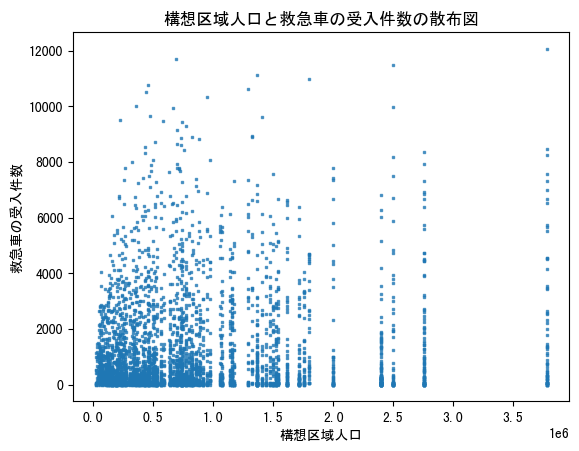

In [34]:
plot_scatter(hdf,['構想区域人口','救急車の受入件数'])

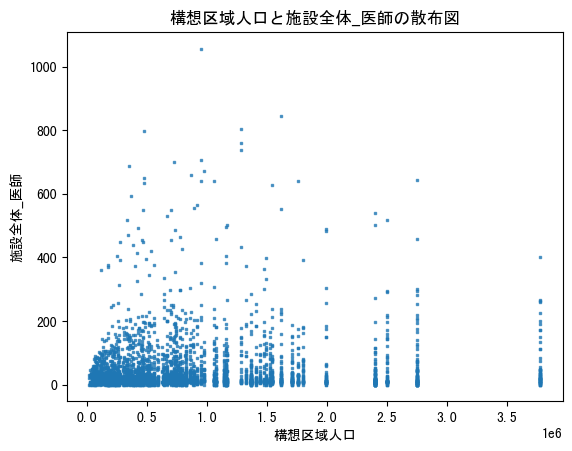

In [35]:
plot_scatter(hdf,['構想区域人口','施設全体_医師'])

### 十和田モデル

In [36]:
hdf[hdf['構想区域名称_x'] == '上十三地域']

医療機関名_x  都道府県コード_x 構想区域名称_x  休日に受診した患者延べ数  \
197         三沢市立三沢病院          2    上十三地域          2165   
418           公立七戸病院          2    上十三地域           523   
465          公立野辺地病院          2    上十三地域           193   
1030  医療法人泰仁会十和田第一病院          2    上十三地域           673   
1501  医療法人社団良風会ちびき病院          2    上十三地域           141   
1728   医療法人赤心会十和田東病院          2    上十三地域            54   
1789       十和田市立中央病院          2    上十三地域          2013   

      休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数  夜間・時間外に受診した患者延べ数  \
197                                276              3808   
418                                100               652   
465                                 55               373   
1030                               235               255   
1501                                60                60   
1728                                 0                53   
1789                               457              5482   

      夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数  救急車の受入件数  施設全体_医師  施設全体_医師_常勤  \
197                                    641      1697     26.0          26   
418                                    294       406      9.4           6   
465                                     93       509      9.7           8   
1030                                    72       172      8.4           2   
1501                                    45        50      5.5           4   
1728                                     0        20      5.9           4   
1789                                  1439      2242     40.0          38   

      院内総病床数  院内総一般病床数  院内総新規入棟患者数（年間）  一般病床_許可病床  療養病床_許可病床  在棟患者延べ数（年間）  \
197      220       220            4186        220          0        19131   
418      110       110            1382         74          0        13300   
465      151       120            2183        120          0        34504   
1030      60        60            1512         60          0        14822   
1501     110        53             951         53          0        12852   
1728      60        60             741         60          0        13518   
1789     318       318            6215        192          0        49595   

      新規入棟患者数（年間）  退棟患者数（年間）  病床数の全体に占める割合  うち、院内の他病棟からの転棟（年間）  \
197          4186       4229    100.000000                 626   
418           908        890     67.272727                  10   
465          2183       2627     79.470199                 892   
1030         1512       1518    100.000000                   0   
1501          889        895     48.181818                   0   
1728          741        762    100.000000                   0   
1789         3634       3626     60.377358                   7   

      うち、家庭からの入院（年間）  うち、他の病院、診療所からの転院（年間）  うち、介護施設、福祉施設からの入院（年間）  \
197             3313                    58                    139   
418              755                    14                    113   
465             1083                    39                    169   
1030             422                   195                    895   
1501             738                    12                    139   
1728             724                    15                      2   
1789            3368                    86                    172   

      うち、介護医療院からの入院（年間）  うち、院内の出生（年間）  うち、その他（年間）    手術総数  全身麻酔の手術総数  放射線治療  \
197                   0            49           1  1783.0      614.0  130.0   
418                   0             0          16   223.0       64.0    0.0   
465                   0             0           0   775.0      217.0    0.0   
1030                  0             0           0    90.0        0.0    0.0   
1501                  0             0           0   162.0       30.0    0.0   
1728                  0             0           0   285.0      260.0    0.0   
1789                  0             0           1  1219.0      328.0   85.0   

       化学療法  構想区域人口      病床利用率     平均存棟日数  新規入棟患者数のうち院内の他病棟からの転棟の割合  \
197   335.0  167931  23.824408   4.546881      

### 救急車受入件数ベース解析

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


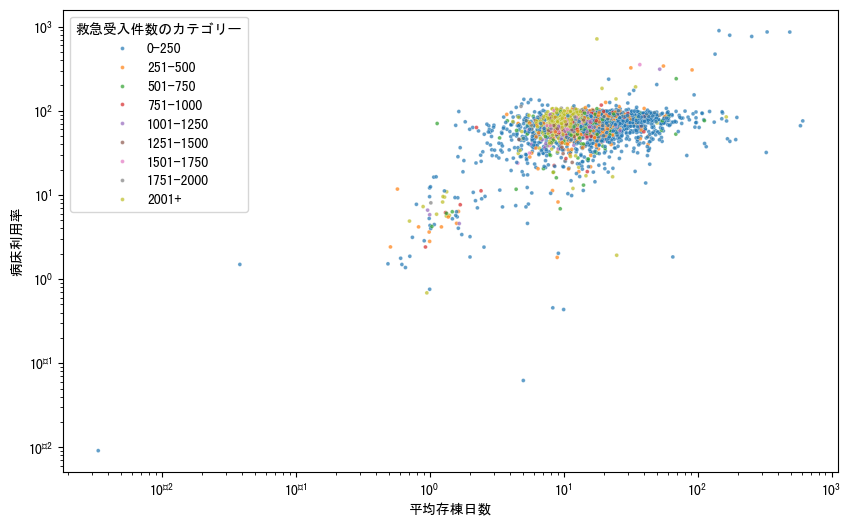

In [37]:
import matplotlib.ticker as mtick
palette = sns.color_palette("tab10", 9)
fig, ax = plt.subplots(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
sns.scatterplot(data=hdf, x='平均存棟日数', y='病床利用率', hue='救急受入件数のカテゴリー', palette=palette, ax=ax, alpha=0.7, s=8)
plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


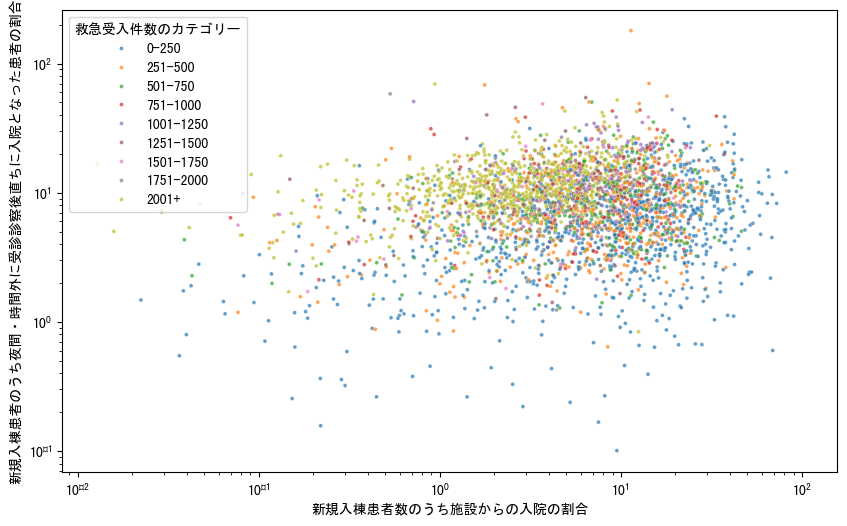

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
sns.scatterplot(data=hdf, x='新規入棟患者数のうち施設からの入院の割合', y='新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合', hue='救急受入件数のカテゴリー', palette=palette, ax=ax, alpha=0.7, s=8)
plt.show()

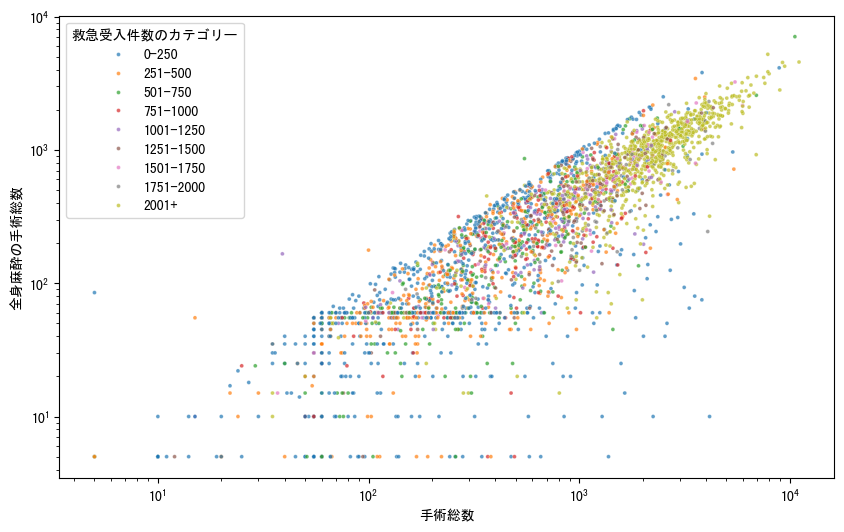

In [39]:
# plot_scatter(hdf[hdf['救急車の受入件数'] <= 500], ['手術総数','全身麻酔の手術総数'])
fig, ax = plt.subplots(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
sns.scatterplot(data=hdf, x='手術総数', y='全身麻酔の手術総数', hue='救急受入件数のカテゴリー', palette=palette, ax=ax, alpha=0.7, s=8)
plt.show()

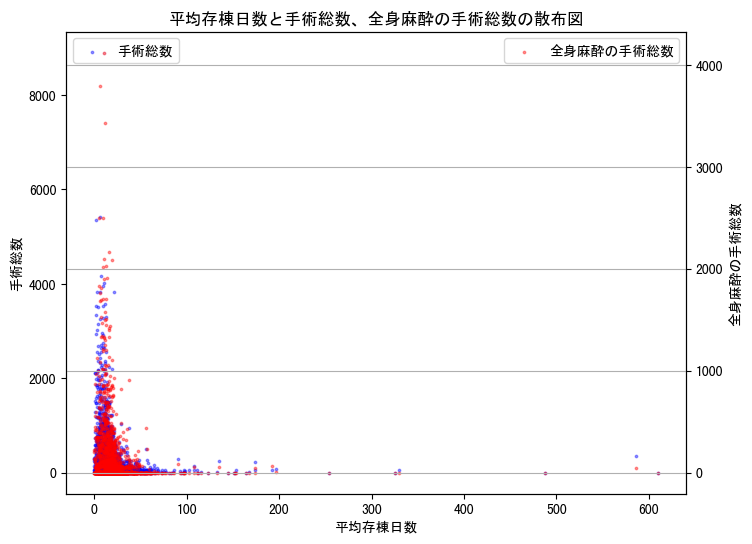

In [40]:
plot_scatter2(hdf[hdf['救急車の受入件数'] <= 500], ['平均存棟日数','手術総数','全身麻酔の手術総数'])

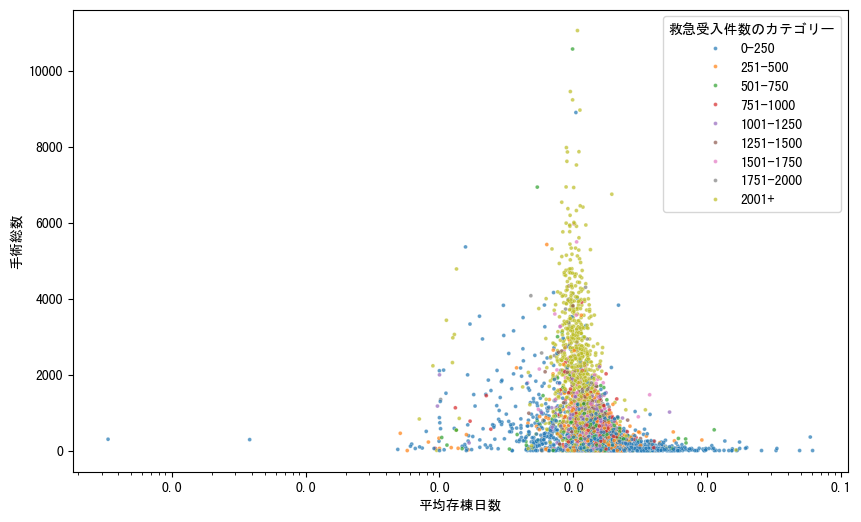

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.xscale('log')
sns.scatterplot(data=hdf, x='平均存棟日数', y='手術総数', hue='救急受入件数のカテゴリー', palette=palette, ax=ax, alpha=0.7, s=8)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/10000)))
plt.show()

### 繰入データ

In [42]:
# 繰入データ
add_df = pd.read_csv("../csv/繰入_集計結果_病院別（千円）.csv")
add_df.info()
add_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   都道府県No.        860 non-null    int64 
 1   都道府県名          860 non-null    object
 2   市町村・組合名        860 non-null    object
 3   病院名            860 non-null    object
 4   ページNo.         860 non-null    int64 
 5   実繰入(計)（千円）     860 non-null    object
 6   医業収益ー医業支出（千円）  860 non-null    object
 7   医業収益（千円）       860 non-null    object
 8   医業費用（千円）       860 non-null    object
dtypes: int64(2), object(7)
memory usage: 60.6+ KB


都道府県No. 都道府県名    市町村・組合名                 病院名  ページNo.   実繰入(計)（千円）  \
0          1   北海道          -                江差病院       3  ¥1,147,247    
1          1   北海道          -                羽幌病院       4    ¥881,077    
2          1   北海道          -               緑ヶ丘病院       5    ¥676,222    
3          1   北海道          -              向陽ヶ丘病院       6    ¥544,581    
4          1   北海道          -                北見病院       7    ¥233,355    
..       ...   ...        ...                 ...     ...          ...   
855       47   沖縄県          -  南部医療センター・こども医療センター       4  ¥2,335,369    
856       47   沖縄県          -                宮古病院       5  ¥1,134,091    
857       47   沖縄県          -               八重山病院       6  ¥1,147,527    
858       47   沖縄県          -                精和病院       7    ¥631,471    
859       47   沖縄県  沖縄県離島医療組合               久米島病院       8    ¥369,620    

    医業収益ー医業支出（千円）      医業収益（千円）      医業費用（千円）  
0    (¥1,518,483)   ¥1,468,267    ¥2,986,750   
1      (¥185,198)   ¥1,468,267    ¥1,653,465   
2      (¥739,611)     ¥995,318    ¥1,734,929   
3      (¥894,224)     ¥730,592    ¥1,624,816   
4       ¥329,134      ¥619,112      ¥289,978   
..            ...           ...           ...  
855  (¥2,552,742)  ¥15,397,345   ¥17,950,087   
856  (¥1,727,230)   ¥5,484,796    ¥7,212,026   
857  (¥1,967,305)   ¥5,102,908    ¥7,070,213   
858  (¥1,277,261)   ¥1,089,950    ¥2,367,211   
859             -             -     ¥308,564   

[860 rows x 9 columns]

In [43]:
import re

def convert_column(column):
    converted = []
    for cell in column:
        # (￥XXXXX)パターンを検出して-XXXXXに変換
        matched = re.match(r'\(¥(\d{1,3}(,\d{3})*)\)', cell)
        if matched:
            converted.append('-' + matched.group(1).replace(',', ''))
        # ￥XXXXXパターンを検出してXXXXXに変換
        else:
            matched = re.match(r'¥(\d{1,3}(,\d{3})*)', cell)
            if matched:
                converted.append(matched.group(1).replace(',', ''))
            else:
                converted.append(cell)
    return converted

add_df['医業収益ー医業支出（千円）'] = convert_column(add_df['医業収益ー医業支出（千円）'] )
add_df = add_df[add_df['医業収益ー医業支出（千円）'] != '-']
add_df['医業収益ー医業支出（千円）'].astype(float) #医業収益ー医業支出（千円）をint型へと変換

0     -1518483.0
1      -185198.0
2      -739611.0
3      -894224.0
4       329134.0
         ...    
854   -3045332.0
855   -2552742.0
856   -1727230.0
857   -1967305.0
858   -1277261.0
Name: 医業収益ー医業支出（千円）, Length: 726, dtype: float64

In [44]:
# カラムに含まれる数値以外のデータ数をカウントする関数
def count_non_numeric(column):
    numeric_column = pd.to_numeric(column, errors='coerce')
    non_numeric_count = numeric_column.isna().sum()
    return non_numeric_count

non_numeric_count = count_non_numeric(add_df['医業収益ー医業支出（千円）'])
print(non_numeric_count)

0


In [45]:
# plot_hist(add_df, '医業収益ー医業支出（千円）')

In [46]:
hdf[hdf['医療機関名_x'].str.contains('江差', case=False)]

医療機関名_x  都道府県コード_x 構想区域名称_x  休日に受診した患者延べ数  \
540  北海道立江差病院          1      南檜山           782   

     休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数  夜間・時間外に受診した患者延べ数  \
540                                93               519   

     夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数  救急車の受入件数  施設全体_医師  施設全体_医師_常勤  \
540                                   182       539      9.0           9   

     院内総病床数  院内総一般病床数  院内総新規入棟患者数（年間）  一般病床_許可病床  療養病床_許可病床  在棟患者延べ数（年間）  \
540     146       146             760        108          0        12866   

     新規入棟患者数（年間）  退棟患者数（年間）  病床数の全体に占める割合  うち、院内の他病棟からの転棟（年間）  うち、家庭からの入院（年間）  \
540          760        725     73.972603                   4             634   

     うち、他の病院、診療所からの転院（年間）  うち、介護施設、福祉施設からの入院（年間）  うち、介護医療院からの入院（年間）  \
540                    30                     89                  0   

     うち、院内の出生（年間）  うち、その他（年間）   手術総数  全身麻酔の手術総数  放射線治療  化学療法  構想区域人口  \
540             0           3  103.0       66.0    0.0  25.0   21139   

         病床利用率     平均存棟日数  新規入棟患者数のうち院内の他病棟からの転棟の割合  新規入棟患者数のうち家庭からの入院の割合  \
540  32.638255  17.327946                  0.526316             83.421053   

     新規入棟患者数のうち他の病院、診療所からの転院の割合  新規入棟患者数のうち介護施設、福祉施設からの入院の割合  \
540                    3.947368                    11.710526   

     新規入棟患者数のうち介護医療院からの入院の割合  新規入棟患者数のうち院内の出生（年間）  新規入棟患者数のうちその他の割合  \
540                      0.0                  0.0          0.394737   

     構想区域人口あたりの救急車受入件数  構想区域全体の総救急車受入件数  個別医療機関の救急車受入数の構想区域全体に占める割合  \
540          25.497895              659                   81.790592   

     構想区域内の救急車受入数の最大割合  施設全体の医師のうち常勤医師の割合  構想区域全体の常勤医師数  \
540          81.790592              100.0            15   

     個別医療機関の常勤医師数の構想区域全体に占める割合  構想区域全体の医師数  個別医療機関の医師数の構想区域全体に占める割合  \
540                       60.0        15.6                57.692308   

     構想区域人口あたりの常勤医師数  構想区域人口あたりの医師数  病床数あたりの常勤医師数  病床数あたりの医師数 救急受入件数のカテゴリー  \
540         0.709589       0.737972      0.061644    0.061644      501-750   

     うち、他病棟、他院から転棟（年間）  うち、施設からの入院（年間）  新規入棟患者数のうち他病棟、他院から転棟の割合  \
540                 34              89                 4.473684   

     新規入棟患者数のうち施設からの入院の割合  新規入棟患者のうち休日に受診診察後直ちに入院となった患者の割合  \
540             11.710526                        12.236842   

     新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合  
540                            23.947368

繰入データの病院名と病床機能報告データの医療機関名が一致しない。。  
時間がないので一旦パス。

### 主成分抽出

In [47]:
hdf.columns

Index(['医療機関名_x', '都道府県コード_x', '構想区域名称_x', '休日に受診した患者延べ数',
       '休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数', '夜間・時間外に受診した患者延べ数',
       '夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数', '救急車の受入件数', '施設全体_医師',
       '施設全体_医師_常勤', '院内総病床数', '院内総一般病床数', '院内総新規入棟患者数（年間）', '一般病床_許可病床',
       '療養病床_許可病床', '在棟患者延べ数（年間）', '新規入棟患者数（年間）', '退棟患者数（年間）', '病床数の全体に占める割合',
       'うち、院内の他病棟からの転棟（年間）', 'うち、家庭からの入院（年間）', 'うち、他の病院、診療所からの転院（年間）',
       'うち、介護施設、福祉施設からの入院（年間）', 'うち、介護医療院からの入院（年間）', 'うち、院内の出生（年間）',
       'うち、その他（年間）', '手術総数', '全身麻酔の手術総数', '放射線治療', '化学療法', '構想区域人口', '病床利用率',
       '平均存棟日数', '新規入棟患者数のうち院内の他病棟からの転棟の割合', '新規入棟患者数のうち家庭からの入院の割合',
       '新規入棟患者数のうち他の病院、診療所からの転院の割合', '新規入棟患者数のうち介護施設、福祉施設からの入院の割合',
       '新規入棟患者数のうち介護医療院からの入院の割合', '新規入棟患者数のうち院内の出生（年間）', '新規入棟患者数のうちその他の割合',
       '構想区域人口あたりの救急車受入件数', '構想区域全体の総救急車受入件数', '個別医療機関の救急車受入数の構想区域全体に占める割合',
       '構想区域内の救急車受入数の最大割合', '施設全体の医師のうち常勤医師の割合', '構想区域全体の常勤医師数',
       '個別医療機関の常勤医師数の構想区域全体に占める割合', '構想区域全体の医師数', '個別医療機関の医師数の構想区域全体に占める割合',
    

In [48]:
from scipy.linalg import eigh

pca_list = ['構想区域人口','手術総数','救急車の受入件数','施設全体_医師_常勤','新規入棟患者数のうち施設からの入院の割合',
            '新規入棟患者数のうち他病棟、他院から転棟の割合','新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合',
            '病床利用率','平均存棟日数','院内総病床数','急性期病床数の施設全体に占める割合','構想区域人口あたりの医師数','構想区域内の救急車受入数の最大割合']

cov_mat = hdf[pca_list].cov()
eigenvalues, eigenvectors = eigh(cov_mat)

# 固有値が最大の固有ベクトルのインデックスを取得
max_eigenvalue_index = np.argmax(eigenvalues)

# 固有値が最大の固有ベクトルを出力
print("固有値が最大の固有ベクトル:")
for col, val in zip(pca_list, eigenvectors[:, max_eigenvalue_index]):
    print(f"{col}: {val:.7f}")

固有値が最大の固有ベクトル:
構想区域人口: 1.0000000
手術総数: 0.0001121
救急車の受入件数: 0.0001938
施設全体_医師_常勤: 0.0000059
新規入棟患者数のうち施設からの入院の割合: -0.0000013
新規入棟患者数のうち他病棟、他院から転棟の割合: 0.0000016
新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合: -0.0000011
病床利用率: -0.0000013
平均存棟日数: -0.0000002
院内総病床数: 0.0000060
病床数の全体に占める割合: 0.0000025
構想区域人口あたりの医師数: 0.0000000
構想区域内の救急車受入数の最大割合: -0.0000159


構想区域人口->救急車の受入件数の順にカテゴライズしてEDAするのが吉か

/workspace/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) MS Gothic.
  fig.canvas.draw()
/workspace/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) MS Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


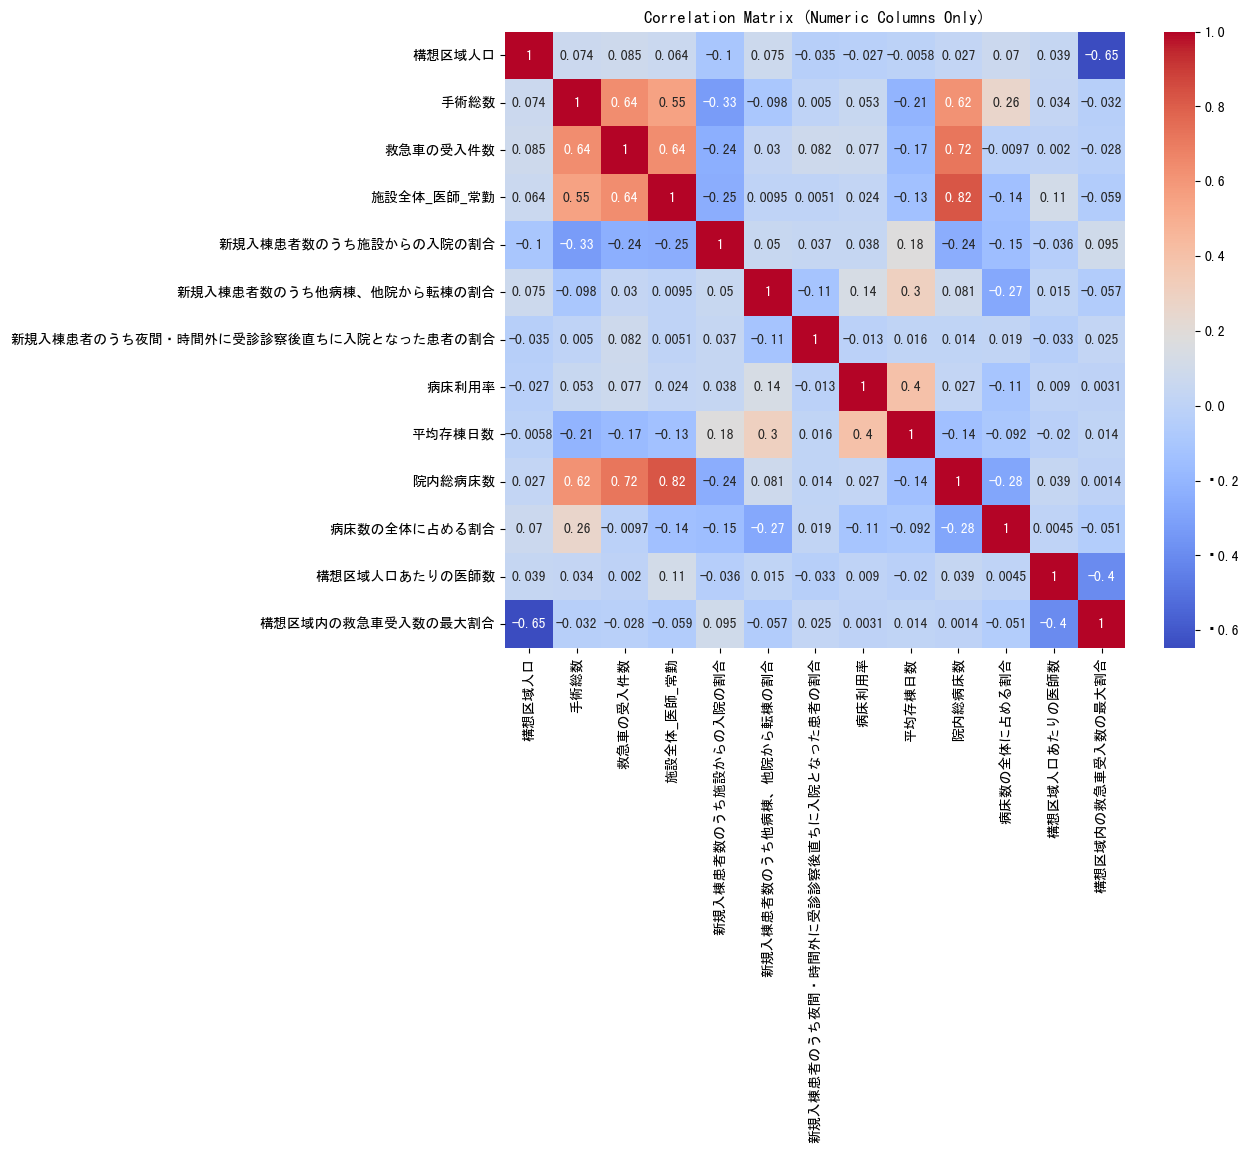

In [49]:
corr = hdf[pca_list].corr() #相関行列を計算

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 10})
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

構想区域人口と施設全体の常勤医師数が相関していないというのは果たして良い医療体制なのか。


### 構想区域人口ベース解析

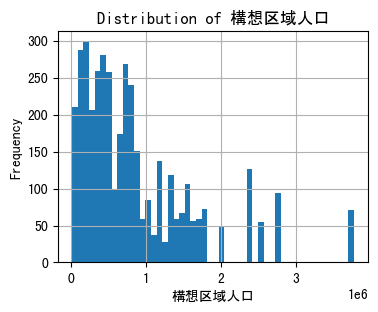

0.166667     212094.0
0.333333     423668.0
0.500000     668916.0
0.666667     887561.0
0.833333    1525152.0
Name: 構想区域人口, dtype: float64


In [50]:
plot_hist(hdf, '構想区域人口')
quantiles = hdf['構想区域人口'].quantile([i/6 for i in range(1, 6)])
print(quantiles)

In [51]:
#構想区域人口を7つにカテゴリー分け
bins = [0, 200000, 400000, 600000, 800000, 1000000, 2000000, float('inf')]
labels = [
    '0-20万', '20-40万', '40-60万', '60-80万', '80-100万', '100-200万', '201+万'
    ]

hdf['構想区域人口のカテゴリー'] = pd.cut(hdf['構想区域人口'], bins=bins, labels=labels, right=False)
preprocessing.tag_count(hdf['構想区域人口のカテゴリー'])

Count
60-80万      573
100-200万    871
201+万       347
20-40万      667
0-20万       613
80-100万     321
40-60万      621

__解析するのはいいが、その数値が何を反映しているのか仮説をたて、さらには、それが良い医療体制なのか悪い体制なのか考察する。そして、悪い体制ならどのような課題解決ができるかまで考える。__

/tmp/ipykernel_775/1828750063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
/tmp/ipykernel_775/1828750063.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_labels_with_n, rotation=45)


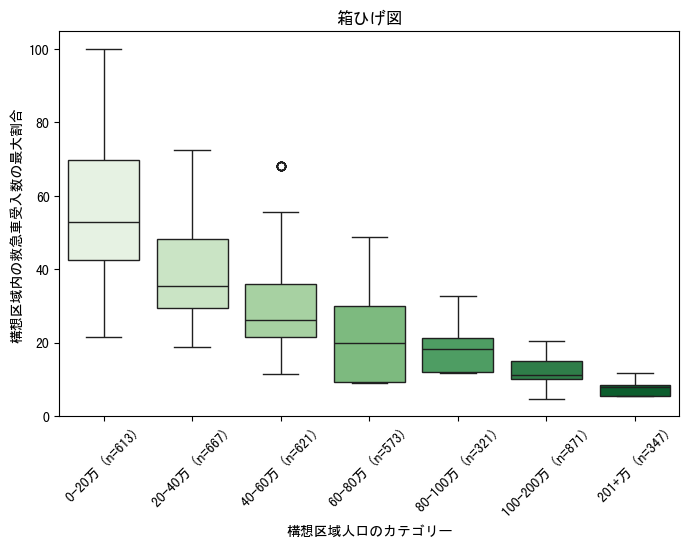

In [52]:
boxplot_cat(hdf, ['構想区域人口のカテゴリー', '構想区域内の救急車受入数の最大割合'])

/tmp/ipykernel_775/1828750063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
/tmp/ipykernel_775/1828750063.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_labels_with_n, rotation=45)


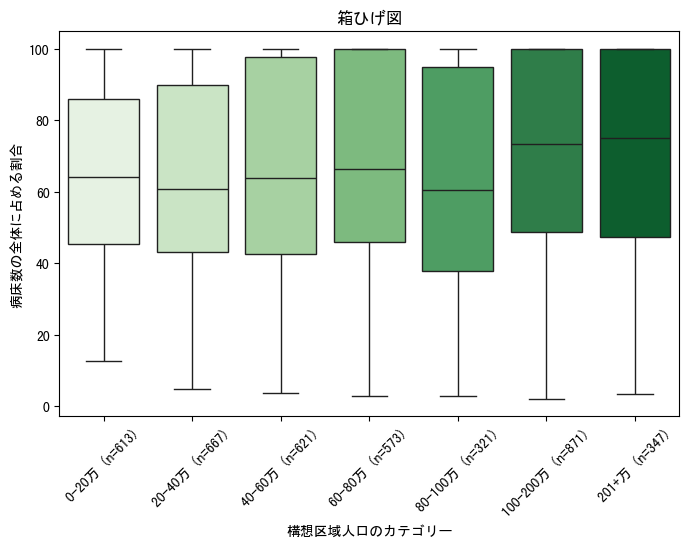

In [53]:
boxplot_cat(hdf, ['構想区域人口のカテゴリー', '急性期病床数の施設全体に占める割合'])

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


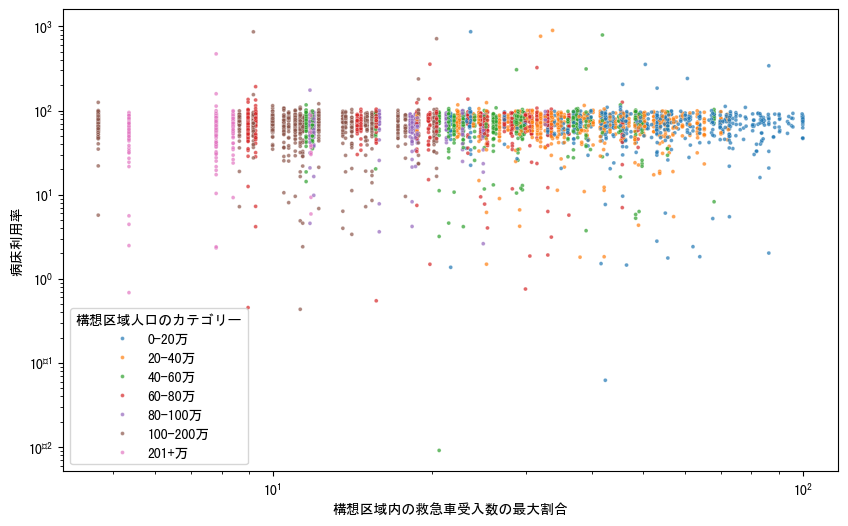

In [54]:
palette2 = sns.color_palette("tab10", 7)
fig, ax = plt.subplots(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
sns.scatterplot(data=hdf, x='構想区域内の救急車受入数の最大割合', y='病床利用率', hue='構想区域人口のカテゴリー', palette=palette2, ax=ax, alpha=0.7, s=8)
plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


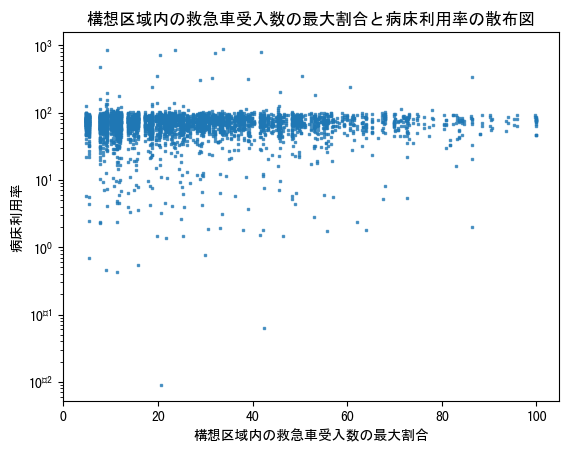

In [55]:
plt.yscale('log')
plot_scatter(hdf, ['構想区域内の救急車受入数の最大割合','病床利用率'])

やはり病院単位ではなく構想区域単位でも可視化しなければ。。  
__任意の構想区域において構想区域の特徴量->病院単位→病棟単位の順にみていくのがよいのでは。__

/tmp/ipykernel_775/3609460505.py:4: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=hdf[hdf['構想区域人口'] < 400000], x='病床利用率', y='平均存棟日数', hue='救急受入件数のカテゴリー', palette=palette2, ax=ax, alpha=0.7, s=8)
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


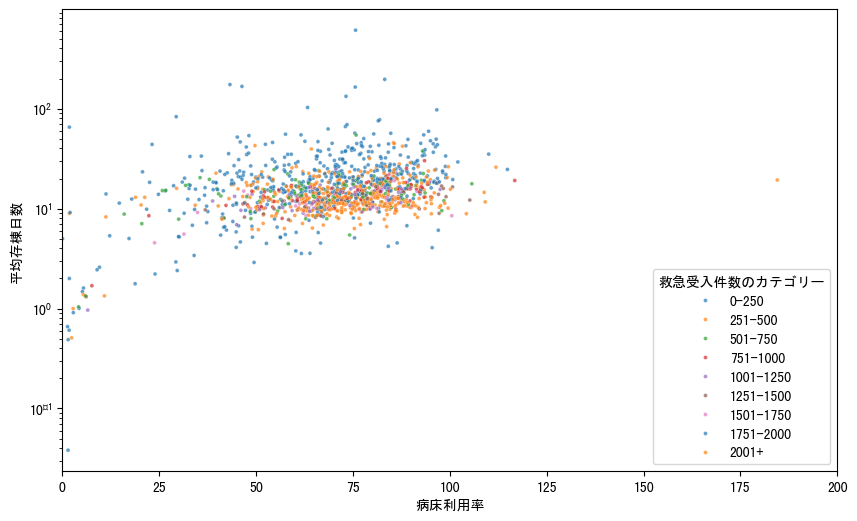

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlim([0,200])
plt.yscale('log')
sns.scatterplot(data=hdf[hdf['構想区域人口'] < 400000], x='病床利用率', y='平均存棟日数', hue='救急受入件数のカテゴリー', palette=palette2, ax=ax, alpha=0.7, s=8)
plt.show()

スタンスをとらないと思考が発散してしまう。

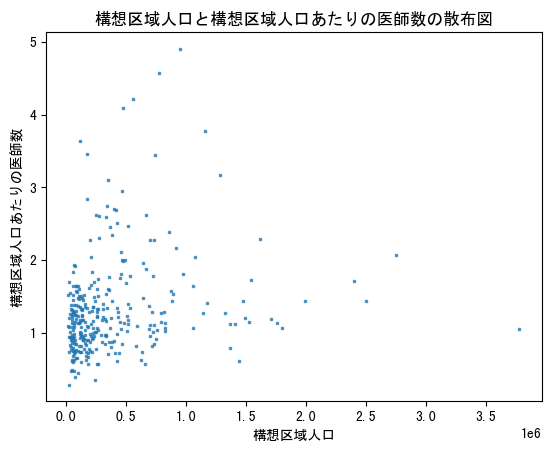

In [57]:
plot_scatter(hdf.groupby('構想区域名称_x').apply('last'),['構想区域人口','構想区域人口あたりの医師数'])

/tmp/ipykernel_775/1828750063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
/tmp/ipykernel_775/1828750063.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_labels_with_n, rotation=45)


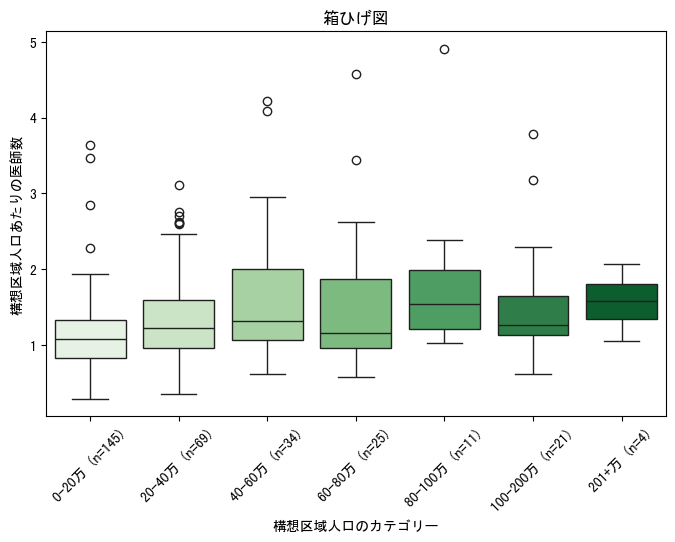

In [58]:
boxplot_cat(hdf.groupby('構想区域名称_x').apply('last'), ['構想区域人口のカテゴリー', '構想区域人口あたりの医師数'])

## LiNGAM実装
データに関する背景知識がほとんどない？から因果探索のアウトプットを仮説として因果推論につなげていこうという作戦。

参照：  
- [Google Colabで統計的因果探索手法LiNGAMを動かしてみた](https://note.com/dd_techblog/n/nc8302f55c775)  

In [79]:
print(hdf[pca_list].isnull().sum())
lingam_df = hdf[pca_list].copy()
for col in pca_list:
    lingam_df[col] = lingam_df[col].fillna(lingam_df[col].mean())
# lingam_df.to_csv('../csv/lingam_df.csv', index=False)

構想区域人口                                   0
手術総数                                     0
救急車の受入件数                                 0
施設全体_医師_常勤                               0
新規入棟患者数のうち施設からの入院の割合                   136
新規入棟患者数のうち他病棟、他院から転棟の割合                136
新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合    115
病床利用率                                    0
平均存棟日数                                 126
院内総病床数                                   0
病床数の全体に占める割合                             0
構想区域人口あたりの医師数                            0
構想区域内の救急車受入数の最大割合                        2
dtype: int64


In [72]:
import graphviz
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

In [73]:
def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.5
    dirs = np.where(idx)
    d = graphviz.Digraph(format='png', engine='dot')
    # フォント設定
    d.attr('node', fontname="MS Gothic", fontsize="10")
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=f'{coef:.2f}', fontsize="10")
    return d

# model = lingam.DirectLiNGAM()
# model.fit(lingam_df)

# labels = [f'{i}. {col}' for i, col in enumerate(lingam_df.columns)]
# display(make_graph(model.adjacency_matrix_, labels))


#FileNotError,ExecutefileNotFoundErrorが生じたため、姑息的にColabで回す　->PJ004参照！

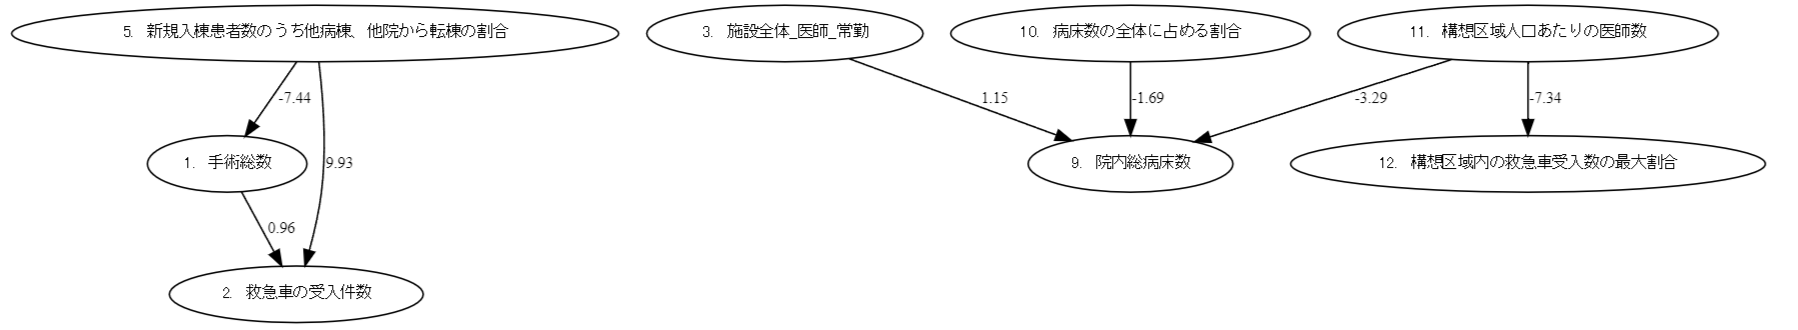
どのような解釈を与えられるか

## 相関マッピング

/workspace/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) MS Gothic.
  fig.canvas.draw()
/workspace/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) MS Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


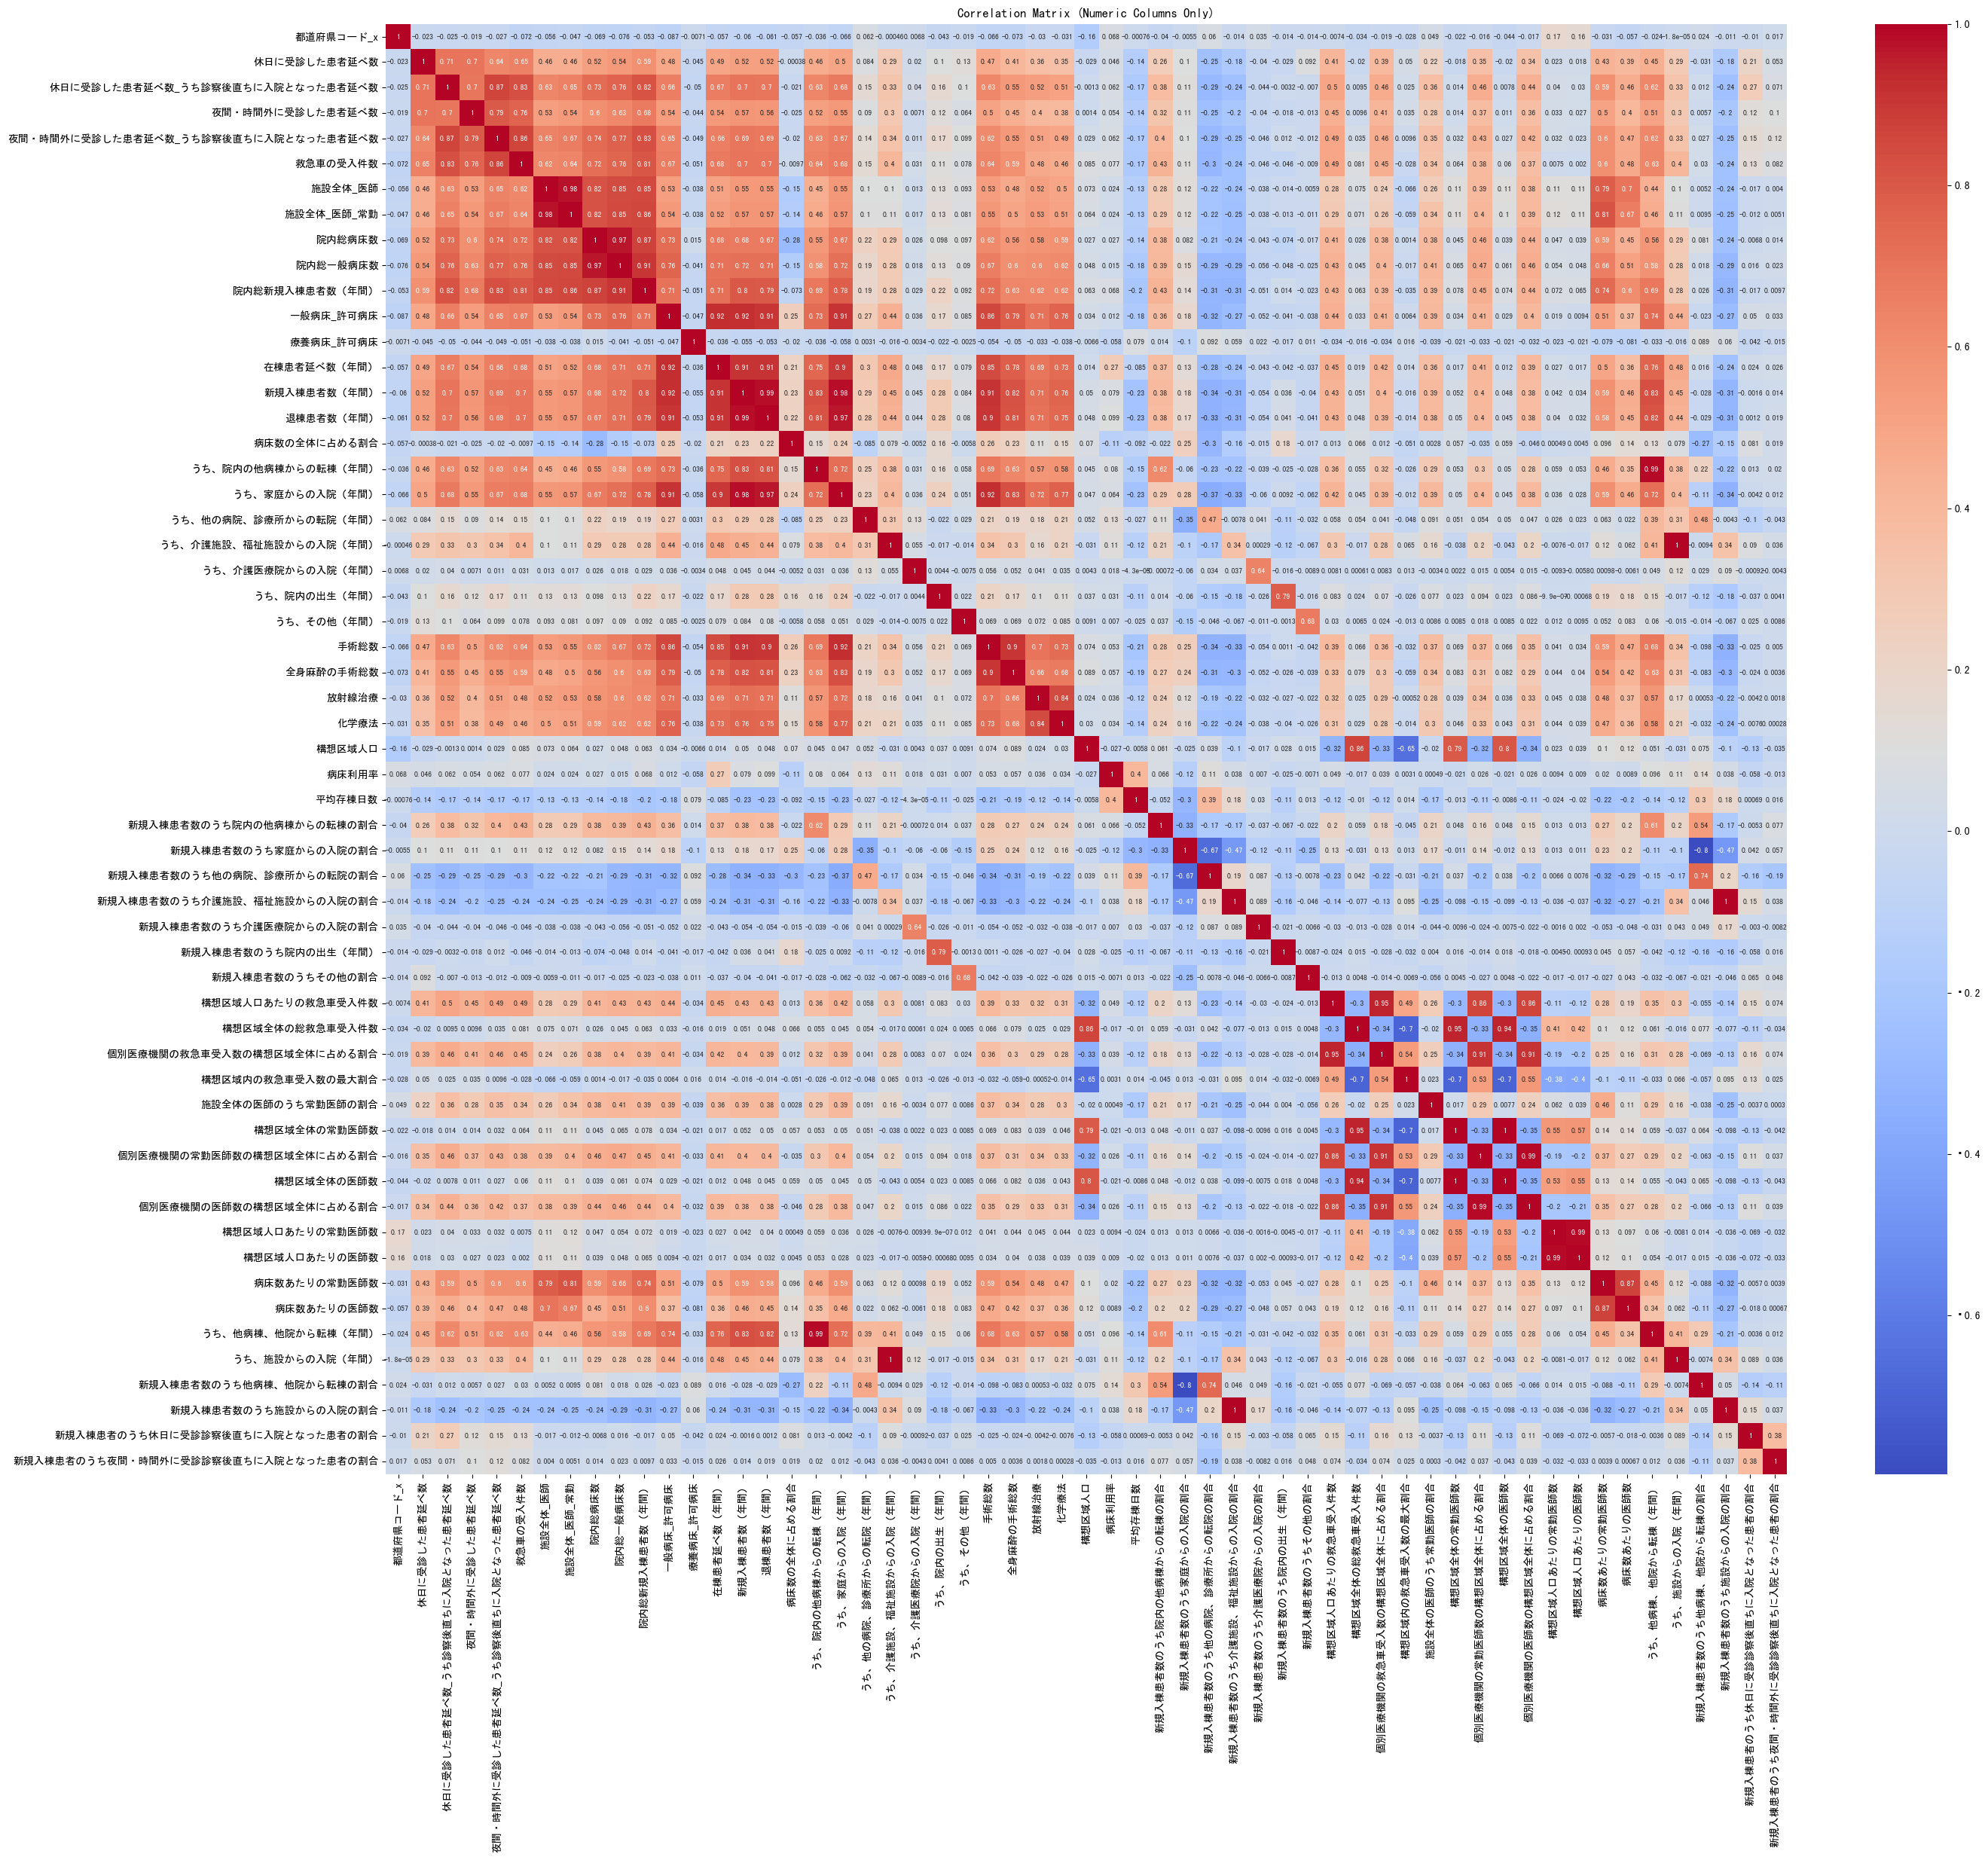

In [59]:
numeric_cols = hdf.drop(['救急受入件数のカテゴリー','構想区域人口のカテゴリー'],axis=1).select_dtypes(exclude=[object]).columns
corr = hdf[numeric_cols].corr() #相関行列を計算

plt.figure(figsize=(30, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 7})
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

## ＤＢ整備
データベース作成の極意：  
- [データベース設計の際に気をつけていること](https://tech.tabechoku.com/entry/2020/06/15/132518)
- [4ステップで作成する、DB論理設計の手順とチェックポイントまとめ](https://qiita.com/nishina555/items/a79ece1b54faf7240fac)
- [データベース設計の基本の進め方！](https://hibiki.dreamarts.co.jp/smartdb/learning/le-sp211202-3/)

In [ ]:
# hdf.to_csv('../csv/AcutecareDB.csv', index=False)